In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/veronicadelgado/code/vdelgadobenito/psycovid/raw_data/COVIDiSTRESS_May_30_cleaned_final.csv', encoding='latin-1')
df.head()

/Users/veronicadelgado/.pyenv/versions/3.8.6/envs/psycovid/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,answered_all,Duration..in.seconds.,RecordedDate,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,...,Final_open,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
0,1,No,180,2020-05-30 23:47:17,SAR,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,...,NaN,2.900000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,No,3100,2020-05-29 23:30:15,UR,20,Male,"College degree, bachelor, master",None,Student,...,NaN,2.200000,2.333333,2.000000,5.000000,5.333333,5.0,5.000000,5.0,NaN
2,3,No,127,2020-05-30 22:40:15,SAR,47,Female,"Some College, short continuing education or eq...",Some College or equivalent,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,No,1710,2020-05-29 22:47:17,BG,79,Male,"College degree, bachelor, master",College degree,Not employed,...,NaN,3.600000,4.000000,4.000000,4.666667,4.000000,5.0,5.000000,3.9,NaN
4,5,No,2239,2020-05-29 22:42:30,SAR,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,...,Informaciones no confiables,2.714286,1.000000,3.666667,4.666667,5.333333,5.0,4.666667,5.0,NaN


In [7]:
df.shape

(125306, 154)

In [58]:
df.describe()

,ID,Duration..in.seconds.,Dem_age,Dem_dependents,Dem_isolation_adults,Dem_isolation_kids,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,...,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
count,125306.000000,1.253060e+05,125306.000000,121456.000000,103941.000000,102223.000000,115256.000000,115225.000000,115272.000000,115169.000000,...,92705.000000,116097.000000,115852.000000,108367.000000,108323.000000,108319.000000,108330.000000,108322.000000,94389.000000,51.000000
mean,62653.500000,2.120863e+03,39.221051,0.868718,1.555180,0.481702,2.605522,2.688210,3.109107,3.725100,...,3.257807,2.631202,2.564836,3.339708,3.951217,4.510548,4.433592,4.358585,4.906285,1.818627
std,36172.870753,8.960468e+03,14.091127,1.656346,2.971847,1.402856,1.113757,1.117136,1.124764,1.015358,...,1.395085,0.735594,0.997359,1.053728,1.119705,0.922260,0.827583,0.884750,0.854199,0.968060
min,1.000000,2.900000e+01,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,31327.250000,7.140000e+02,28.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,2.100000,1.666667,2.666667,3.333333,4.000000,4.000000,3.666667,4.500000,1.000000
50%,62653.500000,1.006000e+03,37.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,4.000000,...,3.000000,2.600000,2.333333,3.333333,4.000000,4.666667,4.333333,4.333333,5.000000,1.750000
75%,93979.750000,1.443000e+03,49.000000,2.000000,2.000000,1.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,3.100000,3.333333,4.000000,4.666667,5.333333,5.000000,5.000000,5.600000,2.500000
max,125306.000000,1.040679e+06,110.000000,110.000000,110.000000,110.000000,5.000000,5.000000,5.000000,5.000000,...,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000


## Study correlations

In [ ]:
# What features are influencing PSS10 average and PSS10 individuals scores?
# Correlation matrix
# Feature permutation

## Option 1 = YES corr= Try linear regression models with found features & PSS10 average

In [118]:
corr = df.corr()

corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[((corr_df['correlation'] >= 0.3) | (corr_df['correlation'] <= -0.3))]

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df[corr_df['feature_1']=='SLON3_avg']

corr_df.head(60)

,feature_1,feature_2,correlation
16296,Scale_UCLA_TRI_avg,Scale_UCLA_TRI_2,0.883984
5247,Scale_UCLA_TRI_2,Scale_UCLA_TRI_avg,0.883984
16295,Scale_UCLA_TRI_avg,Scale_UCLA_TRI_1,0.860509
5119,Scale_UCLA_TRI_1,Scale_UCLA_TRI_avg,0.860509
6778,BFF_15_5,ext,0.858725
15668,ext,BFF_15_5,0.858725
5375,Scale_UCLA_TRI_3,Scale_UCLA_TRI_avg,0.847790
16297,Scale_UCLA_TRI_avg,Scale_UCLA_TRI_3,0.847790
6393,BFF_15_2,neu,0.846138
15537,neu,BFF_15_2,0.846138


In [112]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 

slon3_avg=corr_df[corr_df['feature_1']=='SLON3_avg']
slon3_corr = slon3_avg[abs(slon3_avg['correlation']) > 0.3]

slon3_corr

,feature_1,feature_2,correlation
15376,SLON3_avg,Scale_SLON_1,0.842772
15378,SLON3_avg,Scale_SLON_3,0.842227
15377,SLON3_avg,Scale_SLON_2,0.799852
15479,SLON3_avg,PSS10_avg,0.557960
15368,SLON3_avg,Scale_PSS10_UCLA_3,0.474644
15367,SLON3_avg,Scale_PSS10_UCLA_2,0.454786
15375,SLON3_avg,Scale_PSS10_UCLA_10,0.454117
15374,SLON3_avg,Scale_PSS10_UCLA_9,0.407230
15400,SLON3_avg,Scale_UCLA_TRI_2,0.404833
15371,SLON3_avg,Scale_PSS10_UCLA_6,0.392917


In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(slon3_corr)
plt.show()

In [117]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='PSS10_avg']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]



,feature_1,feature_2,correlation
15247,PSS10_avg,Scale_PSS10_UCLA_10,0.782971
15240,PSS10_avg,Scale_PSS10_UCLA_3,0.751231
15239,PSS10_avg,Scale_PSS10_UCLA_2,0.720879
15246,PSS10_avg,Scale_PSS10_UCLA_9,0.690078
15243,PSS10_avg,Scale_PSS10_UCLA_6,0.678923
15238,PSS10_avg,Scale_PSS10_UCLA_1,0.678436
15352,PSS10_avg,SLON3_avg,0.557960
15249,PSS10_avg,Scale_SLON_2,0.513913
15353,PSS10_avg,neu,0.502054
15274,PSS10_avg,Scale_UCLA_TRI_4,0.477634


In [81]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='SLON3_avg']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]



,feature_1,feature_2,correlation
15376,SLON3_avg,Scale_SLON_1,0.842772
15378,SLON3_avg,Scale_SLON_3,0.842227
15377,SLON3_avg,Scale_SLON_2,0.799852
15479,SLON3_avg,PSS10_avg,0.557960
15368,SLON3_avg,Scale_PSS10_UCLA_3,0.474644
15367,SLON3_avg,Scale_PSS10_UCLA_2,0.454786
15375,SLON3_avg,Scale_PSS10_UCLA_10,0.454117
15374,SLON3_avg,Scale_PSS10_UCLA_9,0.407230
15400,SLON3_avg,Scale_UCLA_TRI_2,0.404833
15371,SLON3_avg,Scale_PSS10_UCLA_6,0.392917


In [82]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_1']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]



,feature_1,feature_2,correlation
6265,BFF_15_1,neu,0.799784
6193,BFF_15_1,BFF_15_2,0.528585
6186,BFF_15_1,Scale_UCLA_TRI_4,0.465741
6152,BFF_15_1,Scale_PSS10_UCLA_3,0.411645
6263,BFF_15_1,PSS10_avg,0.408409
6159,BFF_15_1,Scale_PSS10_UCLA_10,0.333156
6194,BFF_15_1,BFF_15_3,-0.315424


In [83]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_2']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]

,feature_1,feature_2,correlation
6393,BFF_15_2,neu,0.846138
6320,BFF_15_2,BFF_15_1,0.528585
6391,BFF_15_2,PSS10_avg,0.419444
6280,BFF_15_2,Scale_PSS10_UCLA_3,0.404083
6286,BFF_15_2,Scale_PSS10_UCLA_9,0.318733
6287,BFF_15_2,Scale_PSS10_UCLA_10,0.318039
6322,BFF_15_2,BFF_15_3,-0.440613


In [84]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_3']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]

,feature_1,feature_2,correlation
6409,BFF_15_3,Scale_PSS10_UCLA_4,0.322678
6412,BFF_15_3,Scale_PSS10_UCLA_7,0.305845
6462,BFF_15_3,BFF_15_15,0.303875
6448,BFF_15_3,BFF_15_1,-0.315424
6519,BFF_15_3,PSS10_avg,-0.359006
6449,BFF_15_3,BFF_15_2,-0.440613
6521,BFF_15_3,neu,-0.712212


In [85]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_4']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]

,feature_1,feature_2,correlation
6650,BFF_15_4,ext,0.786476
6580,BFF_15_4,BFF_15_5,0.551209
6581,BFF_15_4,BFF_15_6,-0.407350


In [86]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_5']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]


,feature_1,feature_2,correlation
6778,BFF_15_5,ext,0.858725
6707,BFF_15_5,BFF_15_4,0.551209
6782,BFF_15_5,SPS_avg,0.325138
6709,BFF_15_5,BFF_15_6,-0.543971


In [87]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_4']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]

,feature_1,feature_2,correlation
6650,BFF_15_4,ext,0.786476
6580,BFF_15_4,BFF_15_5,0.551209
6581,BFF_15_4,BFF_15_6,-0.407350


In [88]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_5']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]

,feature_1,feature_2,correlation
6778,BFF_15_5,ext,0.858725
6707,BFF_15_5,BFF_15_4,0.551209
6782,BFF_15_5,SPS_avg,0.325138
6709,BFF_15_5,BFF_15_6,-0.543971


In [93]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_6']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]

,feature_1,feature_2,correlation
6835,BFF_15_6,BFF_15_4,-0.407350
6836,BFF_15_6,BFF_15_5,-0.543971
6906,BFF_15_6,ext,-0.805525


In [94]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='BFF_15_7']
pss10_avg
pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]

,feature_1,feature_2,correlation
7035,BFF_15_7,ope,0.779825
6968,BFF_15_7,BFF_15_9,0.495136
6967,BFF_15_7,BFF_15_8,0.336770
6974,BFF_15_7,BFF_15_15,0.308504
7007,BFF_15_7,SPS_9,0.302550


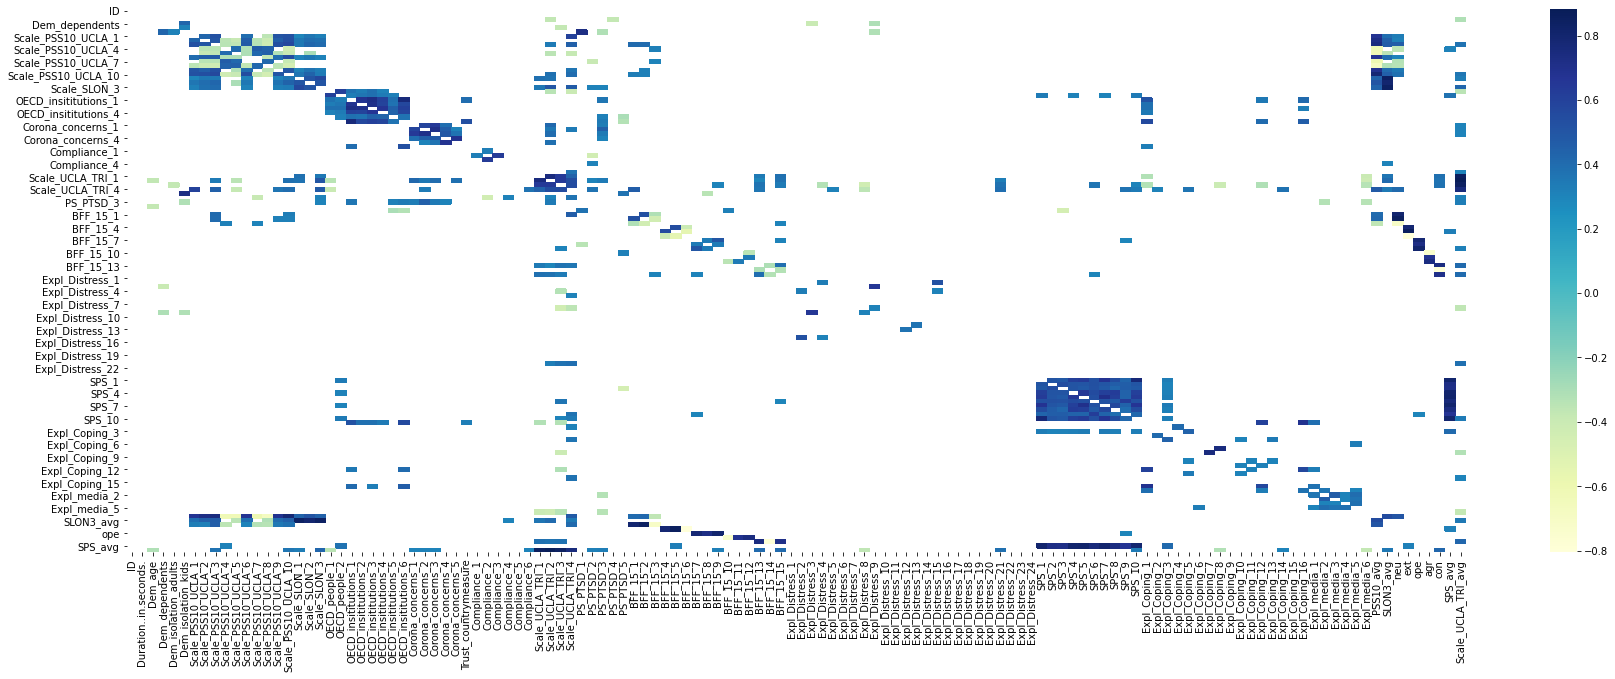

In [92]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .3) | (dfCorr <= -.3)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=False, cmap='YlGnBu')
plt.show()

In [49]:
features = [
 'BFF_15_1',
 'BFF_15_2',
 'BFF_15_3',
 'BFF_15_4',
 'BFF_15_5',
 'BFF_15_6',
 'BFF_15_7',
 'BFF_15_8',
 'BFF_15_9',
 'BFF_15_10',
 'BFF_15_11',
 'BFF_15_12',
 'BFF_15_13',
 'BFF_15_14',
 'BFF_15_15',
'neu',
 'ext',
 'ope',
 'agr',
 'con',
]


In [50]:
formula = "PSS10_avg ~ " + ' + '.join(features)

In [51]:
model = smf.ols(formula = formula, data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              PSS10_avg   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1858.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:29:05   Log-Likelihood:            -1.0085e+05
No. Observations:              104986   AIC:                         2.017e+05
Df Residuals:                  104965   BIC:                         2.019e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.073e+04   9.21e+04      0.334      0.7

In [52]:
model_country = smf.ols('PSS10_avg  ~ Country', data=df).fit()
print(model_country.summary())

                            OLS Regression Results                            
Dep. Variable:              PSS10_avg   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     51.20
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:29:12   Log-Likelihood:            -1.2449e+05
No. Observations:              115723   AIC:                         2.493e+05
Df Residuals:                  115552   BIC:                         2.510e+05
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [53]:
features_2 = [
 'Country',
 'BFF_15_1',
 'BFF_15_2',
 'BFF_15_3',
 'BFF_15_4',
 'BFF_15_5',
 'BFF_15_6',
 'BFF_15_7',
 'BFF_15_8',
 'BFF_15_9',
 'BFF_15_10',
 'BFF_15_11',
 'BFF_15_12',
 'BFF_15_13',
 'BFF_15_14',
 'BFF_15_15',
'neu',
 'ext',
 'ope',
 'agr',
 'con',
]

In [54]:
formula_2 = "PSS10_avg ~ " + ' + '.join(features_2)

In [56]:
model_2 = smf.ols(formula = formula_2, data = df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              PSS10_avg   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     255.6
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:29:39   Log-Likelihood:                -97187.
No. Observations:              104700   AIC:                         1.947e+05
Df Residuals:                  104517   BIC:                         1.965e+05
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

## Option 2 = NO corr = Try logistic regression models; engineer stress categories

In [ ]:
# Drop PSS where there is no answer to all questions
# Sum all values
# Make 3 categories: low stress (0-16), medium stress (17-34), high stress (35-50)

# EDA: correlations data

In [60]:
feat_lon = ['Expl_media_1', 'Expl_media_2', 'Expl_media_3', 'Expl_media_4', 'Expl_media_5',' Expl_media_6']

In [61]:
formula_lon = "SLON3_avg ~ " + ' + '.join(feat_lon)

In [62]:
model_lon = smf.ols(formula = formula_lon, data=df).fit()
print(model_lon.summary())

                            OLS Regression Results                            
Dep. Variable:              SLON3_avg   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     438.8
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:07:27   Log-Likelihood:            -1.2708e+05
No. Observations:               90703   AIC:                         2.542e+05
Df Residuals:                   90696   BIC:                         2.542e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4730      0.014    174.002   

In [64]:
model_lon2 = smf.ols('SLON3_avg  ~ Expl_media_5', data=df).fit()
print(model_lon2.summary())

                            OLS Regression Results                            
Dep. Variable:              SLON3_avg   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     835.9
Date:                Wed, 03 Mar 2021   Prob (F-statistic):          5.45e-183
Time:                        11:08:38   Log-Likelihood:            -1.3062e+05
No. Observations:               92565   AIC:                         2.612e+05
Df Residuals:                   92563   BIC:                         2.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3146      0.009    257.122   

In [70]:
X = df.loc[:, 'BFF_15_1' : 'BFF_15_15'].dropna()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

y = df['SLON3_avg']
X = X

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [113]:
sns.set(style='white')
sns.pairplot(df, height=2)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1174a5c10> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.pairplot(
    df,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
)

In [116]:
df.isnull().sum().sort_values(ascending=False)/len(df)

time_spent_in_war_TXT    0.999984
experience_war_TXT       0.999976
PS_PTSD_5                0.999609
PS_PTSD_3                0.999609
time_spent_in_war        0.999601
                           ...   
answered_all             0.000000
RecordedDate             0.000000
UserLanguage             0.000000
Dem_age                  0.000000
ID                       0.000000
Length: 154, dtype: float64

In [119]:
unfiltered_data = df.copy()
unfiltered_data.drop(columns=['ID','answered_all','Duration..in.seconds.','RecordedDate','experience_war','born_92','experience_war','experience_war_TXT','war_injury','loss_during_war','time_spent_in_war','time_spent_in_war_TXT','Expl_coping_txt','Expl_Distress_txt','Final_open','AD_gain','AD_loss','AD_check'],inplace=True)

In [120]:
unfiltered_data.isnull().sum().sort_values(ascending=False)/len(df)

PS_PTSD_5           0.999609
PS_PTSD_3           0.999609
PS_PTSD_4           0.999601
Scale_UCLA_TRI_4    0.999601
Scale_UCLA_TRI_1    0.999601
                      ...   
Dem_riskgroup       0.004940
Country             0.004349
Dem_gender          0.002442
Dem_age             0.000000
UserLanguage        0.000000
Length: 140, dtype: float64

In [123]:
columns = unfiltered_data.columns

for i in columns:
    print(i, df[i].isna().sum()/len(unfiltered_data))

UserLanguage 0.0
Dem_age 0.0
Dem_gender 0.00244202193031459
Dem_edu 0.006695609148803729
Dem_edu_mom 0.017102133976026685
Dem_employment 0.009073787368521859
Country 0.004349352784383829
Dem_Expat 0.005682090243084928
Dem_state 0.10784798812506984
Dem_maritalstatus 0.008100170781925846
Dem_dependents 0.03072478572454631
Dem_riskgroup 0.004939907107401082
Dem_isolation 0.014229166999185992
Dem_isolation_adults 0.17050260961167063
Dem_isolation_kids 0.1842130464622604
AD_gain 0.5433818013502945
AD_loss 0.5486967902574498
AD_check 0.14117440505642187
Scale_PSS10_UCLA_1 0.0802036614368027
Scale_PSS10_UCLA_2 0.08045105581536399
Scale_PSS10_UCLA_3 0.08007597401560979
Scale_PSS10_UCLA_4 0.0808979617895392
Scale_PSS10_UCLA_5 0.0818955197676089
Scale_PSS10_UCLA_6 0.08013981772620625
Scale_PSS10_UCLA_7 0.08143265286578456
Scale_PSS10_UCLA_8 0.08177581281024053
Scale_PSS10_UCLA_9 0.07974877499880292
Scale_PSS10_UCLA_10 0.08001213030501332
Scale_SLON_1 0.08077027436834629
Scale_SLON_2 0.0813608286

In [ ]:
'Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3', 'Scale_PSS10_UCLA_4', 'Scale_PSS10_UCLA_5', 'Scale_PSS10_UCLA_6', 'Scale_PSS10_UCLA_7', 'Scale_PSS10_UCLA_8', 'Scale_PSS10_UCLA_9', 'Scale_PSS10_UCLA_10'